# Import

In [82]:
library("fuzzyforest")
library("WGCNA")
library("randomForest")

# Data Set

In [31]:
data = Liver_Expr
data[1:5,]

,weight,MMT00000044,MMT00000046,MMT00000051,MMT00000076,MMT00000080,MMT00000102,MMT00000149,MMT00000159,MMT00000207,...,MMT00082822,MMT00082828,MMT00082829,MMT00082832,MMT00082847,MMT00082850,MMT00082869,MMT00082877,MMT00082899,MMT00082906
F2_81,33.7,0.0114,-0.0114,0.05210,-0.02580000,-0.14000,0.11500,-0.0221,-0.131000,-0.00865,...,-0.02840,-0.0518000,-0.0627,-0.1970,0.0425,0.1130,0.1260,2.38e-02,0.0207,-0.0673
F2_271,42.3,-0.0130,-0.0426,0.00537,0.06198364,0.00563,0.00790,0.0266,0.042200,-0.02810,...,-0.06510,-0.0395644,0.0273,0.0184,0.0488,0.1220,-0.0390,-5.27e-05,-0.8840,-0.0320
F2_80,42.7,0.0296,-0.0687,0.10100,0.01030000,-0.10300,0.06970,0.0869,0.109000,-0.02990,...,-0.14100,-0.0188000,-0.0476,0.1630,0.0237,0.1280,-0.0430,-9.80e-02,0.0389,0.0293
F2_188,31.5,0.0106,-0.0358,-0.04970,0.01010000,0.12100,0.00198,-0.2130,0.000801,-0.05330,...,0.05040,-0.0085600,0.0372,-0.1230,-0.1170,-0.0085,0.1190,-4.54e-02,0.1530,-0.0255
F2_307,35.3,0.0278,-0.0789,0.03410,-2.00000000,0.00294,0.09570,0.1560,-0.058200,-0.03450,...,-0.00302,-0.0789000,0.0151,-0.2600,0.0856,0.0639,-0.0366,1.12e-01,-0.0633,0.0458


In [32]:
weight = data[,1] # label
expression_levels = data[,-1] #data matrix; removing the first column

# Fuzzy Forest

## paramters

In [33]:
# params is stored in xxx_control object
# power: belta
WGCNA_params = WGCNA_control(power=6,TOMType="unsigned",minModuleSize=30,
                            numericLabels=TRUE,pamRespectsDendro=FALSE)

In [68]:
mtry_factor     = 1 # mtry = sqrt(p)*mtry_factor; mtry is the num in subspace method
drop_fraction   = 0.25 # drop xxx in each iteration of RFE-RF
number_selected = 10 # we want 10 out of all features
keep_fraction   = 0.05 # keep xxx for each module
min_ntree        = 5000 # used for calculating ntree
ntree_factor    = 5 # used for calculating ntree
final_ntree     = 5000 # RF in selecting step

screen_params = screen_control(drop_fraction = drop_fraction,
                              keep_fraction  = keep_fraction,
                              min_ntree      = min_ntree,
                              mtry_factor    = mtry_factor,
                              ntree_factor   = ntree_factor)

select_params = select_control(drop_fraction  = drop_fraction,
                              number_selected = number_selected,
                              min_ntree       = min_ntree,
                              mtry_factor     = mtry_factor,
                              ntree_factor    = ntree_factor)                              

## Fitting

In [78]:
# a "fuzzy_forest" object
wff_fit = wff(expression_levels,weight,WGCNA_params = WGCNA_params,
             screen_params = screen_params,
             select_params = select_params,
             final_ntree = final_ntree,
             num_processors = 4)

In [79]:
print(wff_fit)

   feature_name variable_importance module_membership
3   MMT00019254           14.118803                11
8   MMT00067823            8.380193                 3
6   MMT00038934            6.405781                 7
4   MMT00030931            5.948589                 7
1   MMT00002575            5.686697                 7
7   MMT00067105            5.479456                 7
5   MMT00032175            4.249932                 7
2   MMT00006001            4.076123                 7
10  MMT00078851            3.895470                 7
9   MMT00078811            3.677247                 3


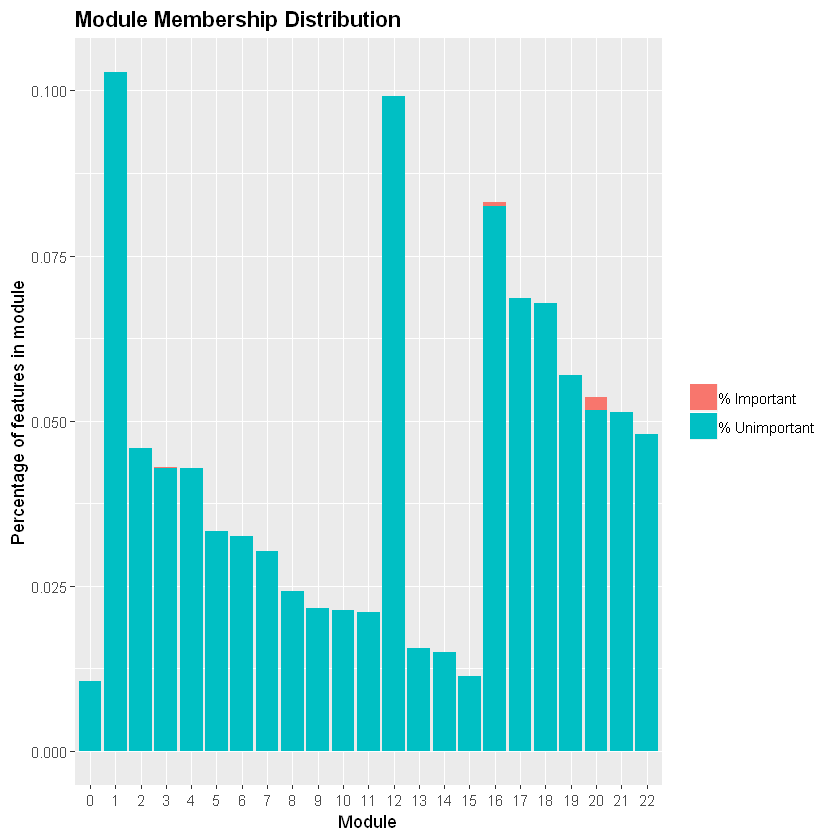

In [80]:
modplot(wff_fit)

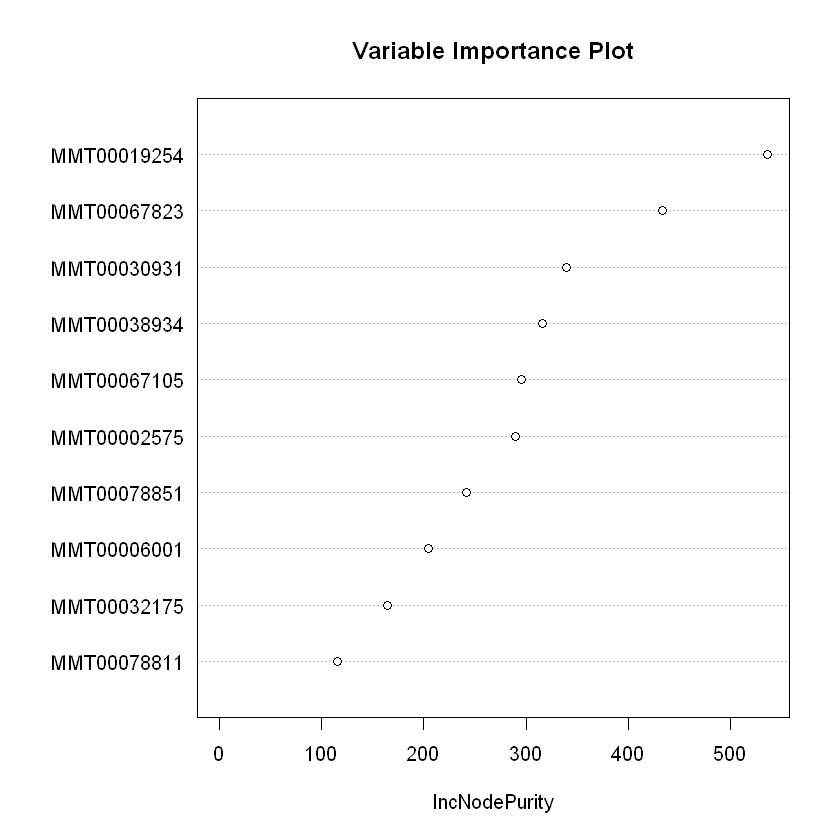

In [84]:
varImpPlot(wff_fit$final_rf,type=2,main="Variable Importance Plot")